In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("C:/Users/saisr/Desktop/Hackathon/data.csv")

In [3]:
df.head()

,x1,x2,y
0,-119.366669,115.000000,1
1,-101.108044,97.777159,1
2,-130.278658,106.767654,1
3,-114.703415,101.195477,1
4,-119.366669,115.000000,1


In [4]:
df.shape

(2227, 3)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2227 entries, 0 to 2226
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      2222 non-null   float64
 1   x2      2224 non-null   float64
 2   y       2227 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 52.3 KB


In [6]:
df.describe()

,x1,x2,y
count,2222.000000,2.224000e+03,2227.000000
mean,-4.818766,8.947626e+04,0.442299
std,74.939909,2.983323e+06,0.496771
min,-134.369160,-1.348761e+02,0.000000
25%,-71.757030,-8.012983e+01,0.000000
50%,-9.836555,-1.046151e+00,0.000000
75%,59.813962,6.389086e+01,1.000000
max,134.508687,1.000000e+08,1.000000


In [7]:
df.isnull().sum()

x1    5
x2    3
y     0
dtype: int64

In [8]:
# Percentage of missing values.
round(df.isnull().sum() * 100 / len(df.index), 2)

x1    0.22
x2    0.13
y     0.00
dtype: float64

In [9]:
# removing NaN x1 rows
df = df.loc[df['x1'].notnull(), :]
round(df.isnull().sum() * 100 / len(df.index), 2)

x1    0.00
x2    0.14
y     0.00
dtype: float64

In [10]:
# removing NaN x2 rows
df = df.loc[df['x2'].notnull(), :]
round(df.isnull().sum() * 100 / len(df.index), 2)

x1    0.0
x2    0.0
y     0.0
dtype: float64

In [11]:
df.shape

(2219, 3)

In [12]:
# Percentage of rows lost in data cleaning.

(2227 - len(df.index)) * 100 / 2227

0.3592276605298608

#### Observation:
We have lost very less amount of data i.e., 0.35% from the dataset.

In [13]:
df['y'] = df['y'].astype(str)

In [14]:
num_attributes = df.select_dtypes(include=['float64','int64'])
print(num_attributes.columns)

Index(['x1', 'x2'], dtype='object')


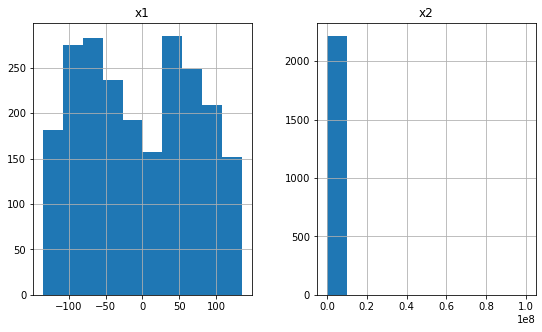

In [15]:
num_attributes.hist(figsize=(9,5))
plt.show()

In [16]:
df['x1'].value_counts()

-118.366669    8
 31.633331     6
-80.366669     5
 103.633331    5
 30.633331     5
              ..
-19.907256     1
 58.434396     1
 18.408090     1
-99.593049     1
 54.003740     1
Name: x1, Length: 1884, dtype: int64

In [17]:
df['x2'].value_counts()

-55.000000     7
-113.000000    7
 47.000000     6
-121.000000    6
 126.000000    6
              ..
-114.715946    1
-80.804223     1
 49.639026     1
 46.993822     1
-14.035979     1
Name: x2, Length: 1879, dtype: int64

In [18]:
df['y'].value_counts()

0    1238
1     981
Name: y, dtype: int64

<AxesSubplot:xlabel='y', ylabel='count'>

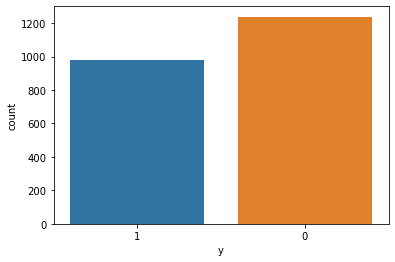

In [19]:
sns.countplot(x = 'y',data = df)

#### Data Preparation.

In [20]:
numerical = df.select_dtypes(include=['int64', 'float64'])
numerical.head()

,x1,x2
0,-119.366669,115.000000
1,-101.108044,97.777159
2,-130.278658,106.767654
3,-114.703415,101.195477
4,-119.366669,115.000000


In [21]:
# scaling the numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_num = pd.DataFrame(scaler.fit_transform(numerical), 
                      columns = numerical.columns)

df_num.head()

,x1,x2
0,-1.529535,-0.029994
1,-1.285831,-0.030000
2,-1.675180,-0.029997
3,-1.467293,-0.029999
4,-1.529535,-0.029994


In [22]:
df_cat = df['y']

In [23]:
df = pd.concat([df_num, df_cat], axis=1)

df.head()

,x1,x2,y
0,-1.529535,-0.029994,1
1,-1.285831,-0.030000,1
2,-1.675180,-0.029997,1
3,-1.467293,-0.029999,1
4,-1.529535,-0.029994,1


In [25]:
X = df_num
y = df_cat

In [26]:
# split into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

In [27]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1553, 2) (1553,)
(666, 2) (666,)


### Step2 - Train different Machine Learning models.

- Logistic Regression.

In [28]:
from sklearn.linear_model import LogisticRegression

clf_logit = LogisticRegression()

clf_logit.fit(X_train, y_train)

LogisticRegression()

In [29]:
X_test.head()

,x1,x2
399,-0.735826,-0.030018
1297,1.089487,-0.030006
913,0.686122,-0.030064
2128,-0.333529,-0.030055
1515,1.006642,-0.030015


In [30]:
y_test_pred = clf_logit.predict(X_test)

In [31]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_test_pred)

0.5525525525525525

- KNN

In [32]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [33]:
y_pred = classifier.predict(X_test)

In [34]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.524024024024024

- Decision Tree

In [35]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth = 2)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [36]:
y_test_pred = classifier.predict(X_test)

In [37]:
# calculate accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(y_test, y_test_pred)

0.7627627627627628

- SVM

In [38]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train, y_train)

SVC()

In [39]:
y_test_pred = classifier.predict(X_test)

In [40]:
# calculate accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(y_test, y_test_pred)

0.5465465465465466

#### Feature Elimination using RFE

In [41]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

clf_logit_rfe = LogisticRegression()

rfe = RFE(clf_logit_rfe)
rfe = rfe.fit(X_train, y_train)

In [42]:
temp_df = pd.DataFrame({'Columns' : X_train.columns, 'Included' : rfe.support_, 'Ranking' : rfe.ranking_})

temp_df.loc[temp_df.Included == True, :]

,Columns,Included,Ranking
0,x1,True,1


In [43]:
X_train_cols = list(X_train.columns[rfe.support_])
len(X_train_cols)

1

In [44]:
X_train_rfe = X_train[X_train_cols]

X_train_rfe.shape

(1553, 1)

In [45]:
clf_logit_rfe.fit(X_train_rfe, y_train)

LogisticRegression()

In [46]:
X_test_rfe = X_test[X_train_cols]

y_test_pred_rfe = clf_logit_rfe.predict(X_test_rfe)

metrics.accuracy_score(y_test, y_test_pred_rfe)

0.5525525525525525

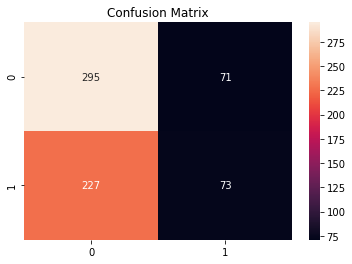

In [47]:
sns.heatmap(metrics.confusion_matrix(y_test, y_test_pred_rfe), annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

In [48]:
prob_rfe = clf_logit_rfe.predict_proba(X_test_rfe)
prob_rfe = prob_rfe[:, 1]
roc_auc_rfe = metrics.roc_auc_score(y_test, prob_rfe)
print(roc_auc_rfe)

0.5554098360655737


### Step3 - Perform proper hyperparameter tuning for each model from Step - 2.

### Principal Component Analysis.

In [49]:
X_train.shape

(1553, 2)

In [50]:
X_train.head()

,x1,x2
532,-0.936303,-0.030005
901,0.552648,-0.030061
1086,0.806208,-0.030023
413,-0.885075,-0.030006
2117,-0.436670,-0.030072


In [51]:
from sklearn.decomposition import PCA
pca = PCA(random_state = 0)

In [52]:
pca.fit(X_train)

PCA(random_state=0)

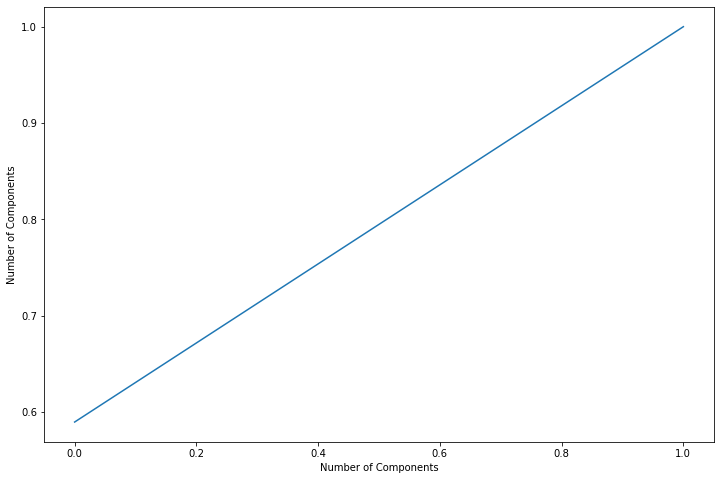

In [53]:
plt.figure(figsize = (12, 8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Number of Components')
plt.show()

In [54]:
np.cumsum(pca.explained_variance_ratio_)

array([0.58956183, 1.        ])

In [55]:
from sklearn.decomposition import PCA

pca_final = PCA(n_components = 2, random_state = 0)

X_train_pca = pca_final.fit_transform(X_train)

In [56]:
X_train_pca.shape

(1553, 2)

In [57]:
corrmat = np.corrcoef(X_train_pca.T)

<AxesSubplot:>

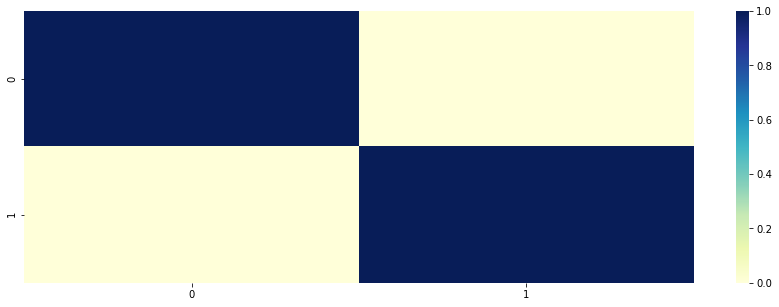

In [58]:
plt.figure(figsize=(15, 5))
sns.heatmap(corrmat, cmap="YlGnBu")

In [59]:
X_test_pca = pca_final.transform(X_test)

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [61]:
clf_logit_pca = LogisticRegression()
clf_tree_pca = DecisionTreeClassifier()
clf_svm_pca = SVC(probability = True)

In [62]:
classifiers = ['LogisticRegression', 'DecisionTreeClassifier', 'SVC']

In [63]:
models = {clf_logit_pca: 'LogisticRegression', 
          clf_tree_pca: 'DecisionTreeClassifier', 
          clf_svm_pca: 'SVC'}

In [64]:
def train(algo, name, X_train_pca, y_train, X_test_pca, y_test):
    algo.fit(X_train_pca, y_train)
    y_test_pred_pca = algo.predict(X_test_pca)
    return y_test_pred_pca


def performance(algo, name, X_test, y_test, y_test_pred_pca):
    # Accuracy Score
    score = metrics.accuracy_score(y_test, y_test_pred_pca)
    print('Accuracy score for', name, ':', score)
    
    # Confusion Metrics
    sns.heatmap(metrics.confusion_matrix(y_test, y_test_pred_pca), annot=True, fmt='d')
    plt.title("Confusion Matrix")
    plt.show()
    
    # Classification Report
    print(metrics.classification_report(y_test, y_test_pred-pca))
    
    # ROC AUC Score
    prob_pca = algo.predict_proba(X_test_pca)
    prob_pca = prob_pca[:, 1]
    roc_auc_pca = metrics.roc_auc_score(y_test, prob_pca)
    print(roc_auc_pca)

### Observation  
Decision Tree is better model for this dataset when compared to other models.